# Behavioral Cloning Notebook

In [42]:
import numpy as np
import cv2
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Import driving log file
log = pd.read_csv("./driving_log.csv", header = None)

In [20]:
img_path = "C:\\Users\\Justin\\projects\\carnd\\CarND-Behavioral-Cloning-P3\\IMG\\"
images = []
measurements = []
for i, path in enumerate(log.iloc[:,0]):
    fname = img_path + path.split("\\")[-1]
    img = cv2.imread(fname)
    images.append(img)
    measure = log.iloc[i, 3]
    measurements.append(measure)

In [15]:
log.iloc[0,0].split("\\")[-1]

'center_2017_05_03_19_27_22_716.jpg'

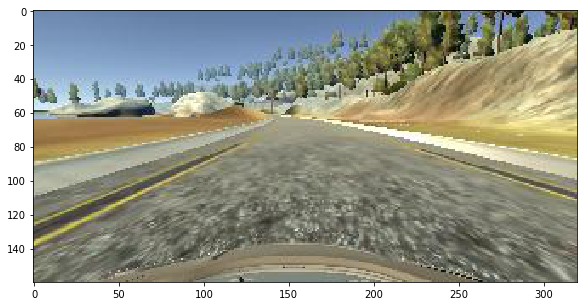

In [34]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
# Convert images and labels into Numpy arrays
X_train = np.array(images)
y_train = np.array(measurements)

In [45]:
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss = "mse", optimizer = "adam")
model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = 7)
model.save("model.h5")

Train on 3382 samples, validate on 846 samples
Epoch 1/7
3382/3382 [==============================] - 10s - loss: 5.7449 - val_loss: 0.7011